# Eda/Viz

In [19]:
import pandas as pd
df=pd.read_csv("/content/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df_cat=df["gender"].value_counts()
df_cat

,count
gender,
female,518
male,482


In [24]:
df_cat=df["race/ethnicity"].value_counts()
df_cat

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [25]:
df_cat=df["test preparation course"].value_counts()
df_cat

,count
test preparation course,
none,642
completed,358


In [26]:

df_cat=df["parental level of education"].value_counts()
df_cat

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


# Pre-processing

In [27]:
for x in df.index:
 if df.loc[x, "parental level of education"] == "some college":
  df.loc[x, "parental level of education"] = "bachelor's degree"

for x in df.index:
 if df.loc[x, "parental level of education"] == "some high school":
  df.loc[x, "parental level of education"] = "high school"
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,bachelor's degree,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,bachelor's degree,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,bachelor's degree,standard,completed,68,78,77


In [28]:
df_cat=df["parental level of education"].value_counts()
df_cat

,count
parental level of education,
high school,375
bachelor's degree,344
associate's degree,222
master's degree,59


In [29]:
df['parental level of education'] = df['parental level of education'].map({
            'high school': 0, "associate's degree": 1, "bachelor's degree": 2, "master's degree": 3
        })

In [30]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[["gender"]])

col_names = encoder.get_feature_names_out(["gender"])

# DataFrame con i nuovi dati
df_encoded = pd.DataFrame(encoded, columns=col_names, index=df.index)

# Concatenazione con il DataFrame originale (e rimozione della colonna originale, che risulta inutile)
df = pd.concat([df.drop(columns=["gender"]), df_encoded], axis=1)

In [31]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[["lunch"]])

col_names = encoder.get_feature_names_out(["lunch"])

# DataFrame con i nuovi dati
df_encoded = pd.DataFrame(encoded, columns=col_names, index=df.index)

# Concatenazione con il DataFrame originale (e rimozione della colonna originale, che risulta inutile)
df = pd.concat([df.drop(columns=["lunch"]), df_encoded], axis=1)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df["race/ethnicity"] = encoder.fit_transform(df[["race/ethnicity"]])

In [33]:
for x in df.index:
 if df.loc[x, "math score"] < 60:
  df.loc[x, "math score"] = 0
 else:
    df.loc[x, "math score"] =1
df

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,1.0,2,none,1,72,74,1.0,0.0,0.0,1.0
1,2.0,2,completed,1,90,88,1.0,0.0,0.0,1.0
2,1.0,3,none,1,95,93,1.0,0.0,0.0,1.0
3,0.0,1,none,0,57,44,0.0,1.0,1.0,0.0
4,2.0,2,none,1,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,4.0,3,completed,1,99,95,1.0,0.0,0.0,1.0
996,2.0,0,none,1,55,55,0.0,1.0,1.0,0.0
997,2.0,0,completed,0,71,65,1.0,0.0,1.0,0.0
998,3.0,2,completed,1,78,77,1.0,0.0,0.0,1.0


In [34]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df["test preparation course"] = encoder.fit_transform(df[["test preparation course"]])

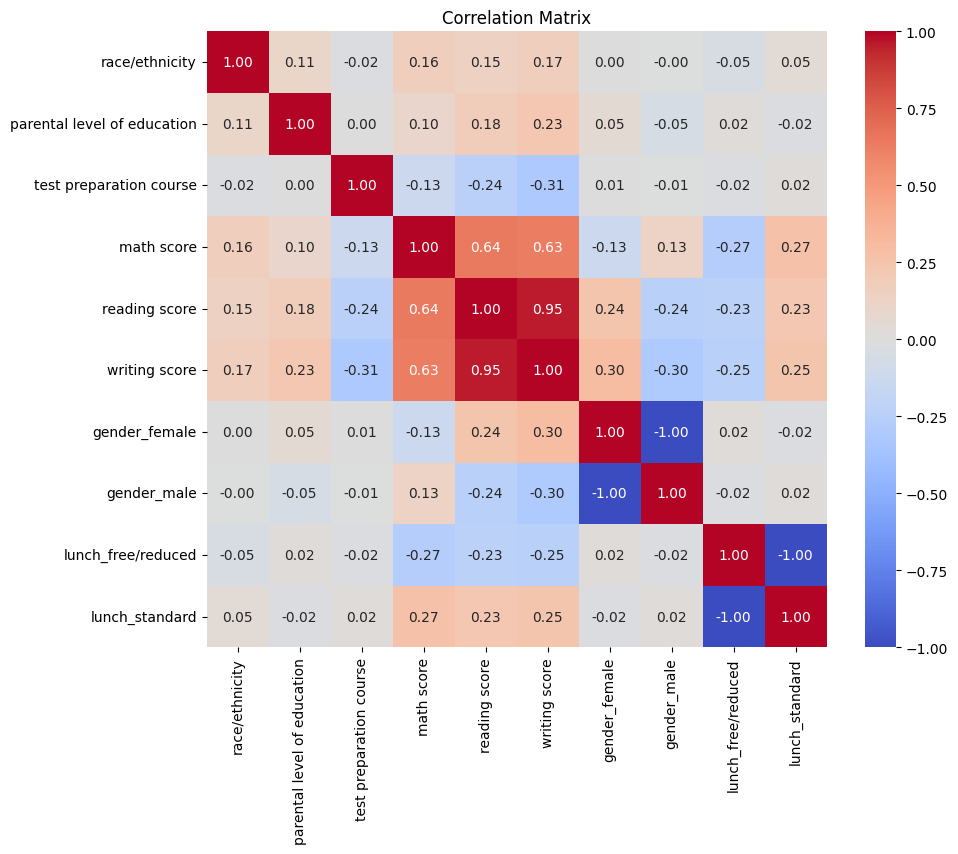

In [35]:
# prompt: genera una matrice di correlazione

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
#ci rendiamo conto che non è utile ai fini della previsione tenere
#le colonne "test preparation course" e "parental level of education"

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   float64
 1   parental level of education  1000 non-null   int64  
 2   test preparation course      1000 non-null   float64
 3   math score                   1000 non-null   int64  
 4   reading score                1000 non-null   int64  
 5   writing score                1000 non-null   int64  
 6   gender_female                1000 non-null   float64
 7   gender_male                  1000 non-null   float64
 8   lunch_free/reduced           1000 non-null   float64
 9   lunch_standard               1000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 78.3 KB


In [37]:
df1=df["math score"]

In [38]:
df=df.drop(columns=["math score"])

In [39]:
df=df.join(df1)

In [40]:
df

,race/ethnicity,parental level of education,test preparation course,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,math score
0,1.0,2,1.0,72,74,1.0,0.0,0.0,1.0,1
1,2.0,2,0.0,90,88,1.0,0.0,0.0,1.0,1
2,1.0,3,1.0,95,93,1.0,0.0,0.0,1.0,1
3,0.0,1,1.0,57,44,0.0,1.0,1.0,0.0,0
4,2.0,2,1.0,78,75,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
995,4.0,3,0.0,99,95,1.0,0.0,0.0,1.0,1
996,2.0,0,1.0,55,55,0.0,1.0,1.0,0.0,1
997,2.0,0,0.0,71,65,1.0,0.0,1.0,0.0,0
998,3.0,2,0.0,78,77,1.0,0.0,0.0,1.0,1


# Modello

In [41]:
X = df.iloc[:, :-1].values

#il primo : seleziona tutte le righe, "-1" seleziona l'ultima colonna
y = df.iloc[:, -1].values

In [42]:

# Normalizzazione

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split in train e test
X_train, X_test, y_train, y_test = train_test_split(
   X_scaled, y, test_size=0.2, random_state=42
)

# Conversione in float32 (richiesto da TensorFlow)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [43]:
# Costruzione del modello
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.initializers import Constant
import zipfile
import requests
import io
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output binario
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(X_train, y_train,
 epochs=20,
 batch_size=32,
 validation_split=0.2)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7473 - loss: 0.5849 - val_accuracy: 0.8500 - val_loss: 0.4081
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8793 - loss: 0.3638 - val_accuracy: 0.8813 - val_loss: 0.3107
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8793 - loss: 0.2943 - val_accuracy: 0.8562 - val_loss: 0.2703
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8952 - loss: 0.2462 - val_accuracy: 0.8813 - val_loss: 0.2511
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9057 - loss: 0.2223 - val_accuracy: 0.8562 - val_loss: 0.2498
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8980 - loss: 0.2456 - val_accuracy: 0.8687 - val_loss: 0.2467
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8915 - loss: 0.2348 - val_accuracy: 0.8750 - val_loss: 0.2472
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8892 - loss: 0.2465 - val_accuracy: 0.8750 - val_loss

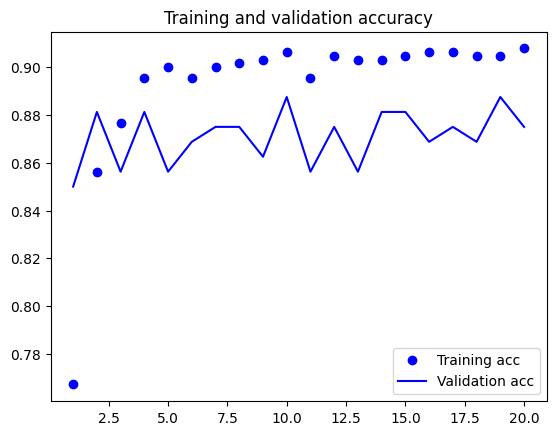

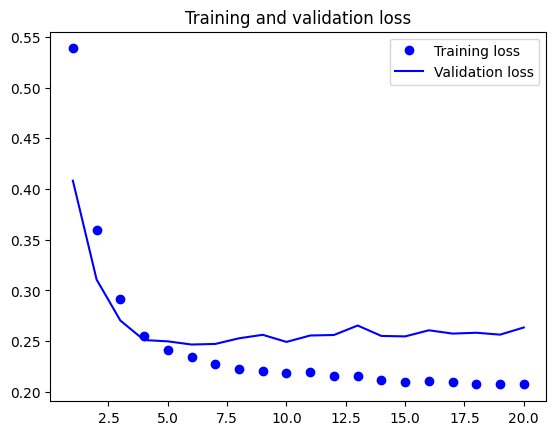

In [45]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
results = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9451 - loss: 0.1724


# Tuning

## Primo tentativo:
Cambiamento della batch-size

In [47]:
# Costruzione del modello
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.initializers import Constant
import zipfile
import requests
import io
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output binario
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model.fit(X_train, y_train,
 epochs=10,
 batch_size=512,
 validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6133 - loss: 0.6915 - val_accuracy: 0.6812 - val_loss: 0.6396
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6866 - loss: 0.6401 - val_accuracy: 0.7375 - val_loss: 0.5942
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7279 - loss: 0.5945 - val_accuracy: 0.7563 - val_loss: 0.5550
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7444 - loss: 0.5571 - val_accuracy: 0.7625 - val_loss: 0.5212
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7553 - loss: 0.5233 - val_accuracy: 0.7812 - val_loss: 0.4916
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7751 - loss: 0.4951 - val_accuracy: 0.8000 - val_loss: 0.4652
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7935 - loss: 0.4664 - val_accuracy: 0.8250 - val_loss: 0.4416
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8081 - loss: 0.4446 - val_accuracy: 0.8687 - val_loss: 0.4204
Ep

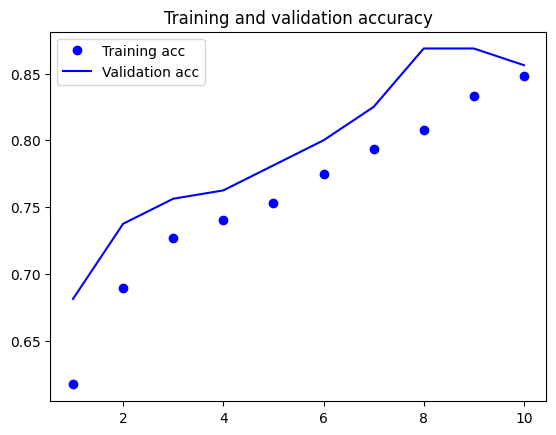

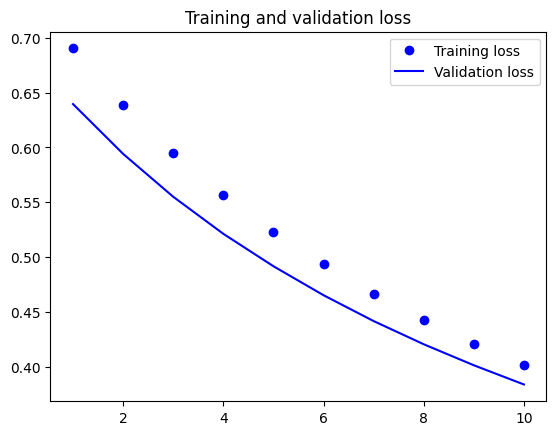

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
results = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8312 - loss: 0.3764


## Secondo tentativo:
Modifica del numero di nodi nel secondo layer

In [51]:
# Costruzione del modello
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.initializers import Constant
import zipfile
import requests
import io
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output binario
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(X_train, y_train,
 epochs=10,
 batch_size=512,
 validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3490 - loss: 0.7780 - val_accuracy: 0.3750 - val_loss: 0.7386
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.3809 - loss: 0.7365 - val_accuracy: 0.4750 - val_loss: 0.6984
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.4529 - loss: 0.6974 - val_accuracy: 0.5750 - val_loss: 0.6638
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5896 - loss: 0.6659 - val_accuracy: 0.6750 - val_loss: 0.6342
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6772 - loss: 0.6401 - val_accuracy: 0.7000 - val_loss: 0.6092
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7198 - loss: 0.6137 - val_accuracy: 0.7437 - val_loss: 0.5878
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7414 - loss: 0.5955 - val_accuracy: 0.7937 - val_loss: 0.5683
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7833 - loss: 0.5744 - val_accuracy: 0.8188 - val_loss: 0.

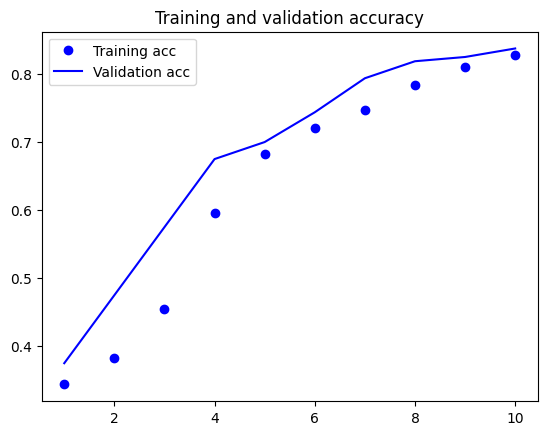

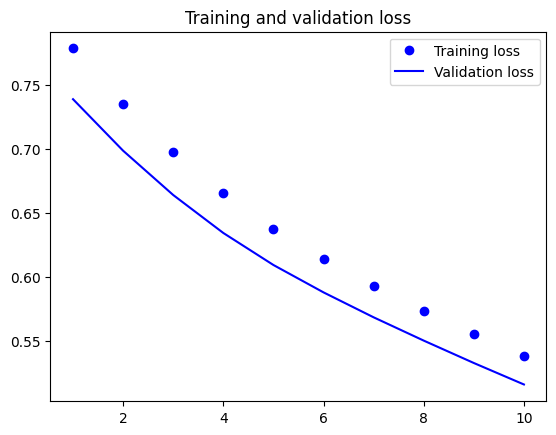

In [53]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
results = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8893 - loss: 0.4976
